https://github.com/techshot25/Autoencoders/blob/master/simple-autoencoder.ipynb
This simple code shows you how to make an autoencoder using Pytorch. The idea is to bring down the number of dimensions (or reduce the feature space) using neural networks.

The idea is simple, let the neural network learn how to make the encoder and the decoder using the feature space as both the input and the output of the network.

### Import relevant packages

In [83]:
import torch
from torch import nn, optim
import numpy as np
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.preprocessing import MinMaxScaler

import pandas as pd

In [84]:
import skfda
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from skfda.exploratory.depth import ModifiedBandDepth, IntegratedDepth
from skfda.exploratory.visualization import Boxplot

from skfda.exploratory.visualization.clustering import (
    ClusterMembershipLinesPlot,
    ClusterMembershipPlot,
    ClusterPlot,
)
from skfda.ml.clustering import FuzzyCMeans, KMeans

from skfda.exploratory.visualization import FPCAPlot
from skfda.preprocessing.dim_reduction.feature_extraction import FPCA
from skfda.representation.basis import BSpline, Fourier, Monomial

### Read in data

In [85]:
device = ('cuda' if torch.cuda.is_available() else 'cpu')

In [86]:
X = pd.read_csv('/Users/zarawaheed/Documents/BostonUniversity/MA679/Final Project/Data/ML_GRF_stance_N.csv').values

In [87]:
Y = pd.read_csv('/Users/zarawaheed/Documents/BostonUniversity/MA679/Final Project/Data/AP_GRF_stance_N.csv').values

In [88]:
Z = pd.read_csv('/Users/zarawaheed/Documents/BostonUniversity/MA679/Final Project/Data/V_GRF_stance_N.csv').values

### Define functions and build Autoencoder

In [89]:
class Autoencoder(nn.Module):
    """Makes the main denoising auto

    Parameters
    ----------
    in_shape [int] : input shape
    enc_shape [int] : desired encoded shape
    """

    def __init__(self, in_shape, enc_shape):
        super(Autoencoder, self).__init__()
        
        self.encode = nn.Sequential(
            nn.Linear(in_shape, 128),
            nn.ReLU(True),
            nn.Dropout(0.2), #regularization
            nn.Linear(128, 64),
            nn.ReLU(True),
            nn.Dropout(0.2),
            nn.Linear(64, enc_shape),
        )
        
        self.decode = nn.Sequential(
            nn.BatchNorm1d(enc_shape),
            nn.Linear(enc_shape, 64),
            nn.ReLU(True),
            nn.Dropout(0.2),
            nn.Linear(64, 128),
            nn.ReLU(True),
            nn.Dropout(0.2),
            nn.Linear(128, in_shape)
        )
        
    def forward(self, x):
        x = self.encode(x)
        x = self.decode(x)
        return x

In [90]:
def train(model, error, optimizer, n_epochs, x):
    model.train()
    for epoch in range(1, n_epochs + 1):
        optimizer.zero_grad()
        output = model(x)
        loss = error(output, x)
        loss.backward()
        optimizer.step()
        
        if epoch % int(0.1*n_epochs) == 0:
            print(f'epoch {epoch} \t Loss: {loss.item():.4g}')

In [91]:
#Defining a list of grid points
grid_points_100 = list(range(1,101))
grid_points_2990 = list(range(1,2991))

#### 1. GRF_ML

In [92]:
x = torch.from_numpy(X).to(device)

In [93]:
encoder_x = Autoencoder(in_shape=100, enc_shape=2).double().to(device)

error_x = nn.MSELoss()

optimizer_x = optim.Adam(encoder.parameters())

In [94]:
train(encoder_x, error_x, optimizer_x, 10, x)

epoch 1 	 Loss: 1249
epoch 2 	 Loss: 1249
epoch 3 	 Loss: 1249
epoch 4 	 Loss: 1249
epoch 5 	 Loss: 1249
epoch 6 	 Loss: 1249
epoch 7 	 Loss: 1249
epoch 8 	 Loss: 1249
epoch 9 	 Loss: 1249
epoch 10 	 Loss: 1249


In [95]:
with torch.no_grad():
    encoded_x = encoder_x.encode(x)
    decoded_x = encoder_x.decode(encoded_x)
    mse_x = error(decoded_x, x).item()
    enc_x = encoded_x.cpu().detach().numpy()
    dec_x = decoded_x.cpu().detach().numpy()

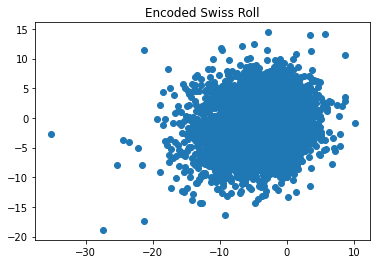

In [96]:
plt.scatter(enc_x[:, 0], enc_x[:, 1], cmap=plt.cm.jet)
plt.title('Encoded Swiss Roll')
plt.show()

In [97]:
dec_x_fd = skfda.FDataGrid(
    data_matrix=dec_x,
    grid_points=grid_points_100,
)

 /var/folders/3f/jf0vyw7d5dz_ypqzwp3mnylm0000gn/T/ipykernel_48858/2708633632.py:2: UserWarning:Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


Text(0, 0.5, 'ML_GRF')

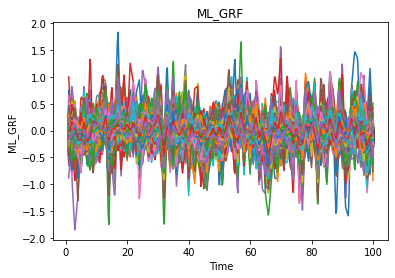

In [98]:
fig = dec_x_fd.plot()
fig.show()
plt.title("ML_GRF")
plt.xlabel("Time")
plt.ylabel("ML_GRF")

In [99]:
# pd.DataFrame(enc_x)

#### 2. GRF_AP

In [100]:
y = torch.from_numpy(Y).to(device)

In [101]:
encoder_y = Autoencoder(in_shape=100, enc_shape=2).double().to(device)

error_y = nn.MSELoss()

optimizer_y = optim.Adam(encoder_y.parameters())

In [102]:
train(encoder_y, error_y, optimizer_y, 10, y)

epoch 1 	 Loss: 6964
epoch 2 	 Loss: 6960
epoch 3 	 Loss: 6957
epoch 4 	 Loss: 6954
epoch 5 	 Loss: 6950
epoch 6 	 Loss: 6947
epoch 7 	 Loss: 6943
epoch 8 	 Loss: 6939
epoch 9 	 Loss: 6934
epoch 10 	 Loss: 6929


In [103]:
with torch.no_grad():
    encoded_y = encoder.encode(y)
    decoded_y = encoder.decode(encoded_y)
    mse_y = error(decoded_y, y).item()
    enc_y = encoded_y.cpu().detach().numpy()
    dec_y = decoded_y.cpu().detach().numpy()

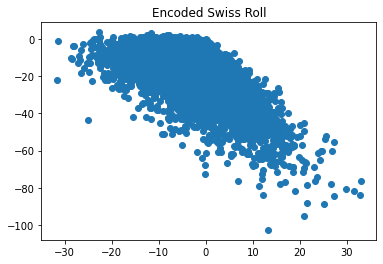

In [104]:
plt.scatter(enc_y[:, 0], enc_y[:, 1], cmap=plt.cm.jet)
plt.title('Encoded Swiss Roll')
plt.show()

In [105]:
dec_y_fd = skfda.FDataGrid(
    data_matrix=dec_y,
    grid_points=grid_points_100,
)

 /var/folders/3f/jf0vyw7d5dz_ypqzwp3mnylm0000gn/T/ipykernel_48858/1730695689.py:2: UserWarning:Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


Text(0, 0.5, 'AP_GRF')

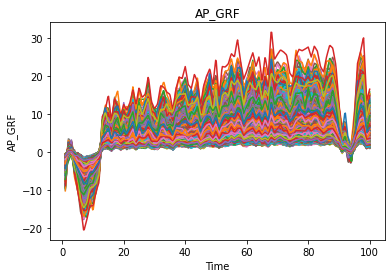

In [106]:
fig = dec_y_fd.plot()
fig.show()
plt.title("AP_GRF")
plt.xlabel("Time")
plt.ylabel("AP_GRF")

#### 3. GRF_V

In [107]:
z = torch.from_numpy(Z).to(device)

In [108]:
encoder_z = Autoencoder(in_shape=100, enc_shape=2).double().to(device)

error_z = nn.MSELoss()

optimizer_z = optim.Adam(encoder_z.parameters())

In [109]:
train(encoder_z, error_z, optimizer_z, 10, z)

epoch 1 	 Loss: 4.667e+05
epoch 2 	 Loss: 4.667e+05
epoch 3 	 Loss: 4.667e+05
epoch 4 	 Loss: 4.666e+05
epoch 5 	 Loss: 4.666e+05
epoch 6 	 Loss: 4.666e+05
epoch 7 	 Loss: 4.665e+05
epoch 8 	 Loss: 4.665e+05
epoch 9 	 Loss: 4.665e+05
epoch 10 	 Loss: 4.664e+05


In [110]:
with torch.no_grad():
    encoded_z = encoder.encode(z)
    decoded_z = encoder.decode(encoded_z)
    mse_z = error(decoded_z, z).item()
    enc_z = encoded_z.cpu().detach().numpy()
    dec_z = decoded_z.cpu().detach().numpy()

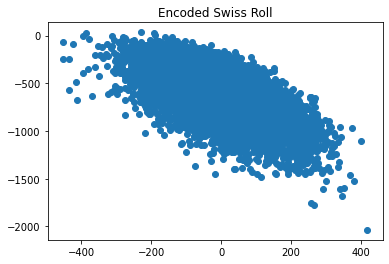

In [111]:
plt.scatter(enc_z[:, 0], enc_z[:, 1], cmap=plt.cm.jet)
plt.title('Encoded Swiss Roll')
plt.show()

In [112]:
dec_z_fd = skfda.FDataGrid(
    data_matrix=dec_z,
    grid_points=grid_points_100,
)

 /var/folders/3f/jf0vyw7d5dz_ypqzwp3mnylm0000gn/T/ipykernel_48858/945230942.py:2: UserWarning:Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


Text(0, 0.5, 'V_GRF')

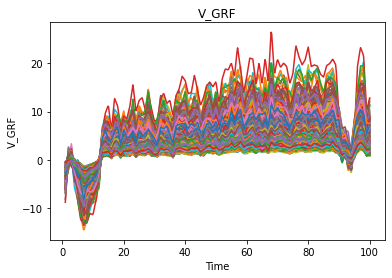

In [113]:
fig = dec_z_fd.plot()
fig.show()
plt.title("V_GRF")
plt.xlabel("Time")
plt.ylabel("V_GRF")

### Calculate the MSE

In [118]:
# Define function for MSE

def mse(array1,array2):
    diff = array1 - array2
    sqdiff = diff**2
    n = len(sqdiff)
    
    sum_sqdiff = sum(sqdiff)
    return sum_sqdiff/n

In [122]:
# GRF_ML

ML_GRF_reconst_array = dec_x.flatten()
ML_GRF_array = X.flatten()

In [123]:
mse(ML_GRF_array, ML_GRF_reconst_array)

1248.8802078900274

In [128]:
# GRF_AP

AP_GRF_reconst_array = dec_y.flatten()
AP_GRF_array = Y.flatten()

In [129]:
mse(AP_GRF_array, AP_GRF_reconst_array)

6830.5959400577785

In [130]:
# GRF_V

V_GRF_reconst_array = dec_z.flatten()
V_GRF_array = Z.flatten()

In [131]:
mse(V_GRF_array, V_GRF_reconst_array)

462693.9211887896